# Sentiment analysis
deep learning model for analysing sentiments.

## Requirement
 - Tensorflow
 - Keras
 - sklearn
 - pandas
 - Numpy

In [2]:
from keras.layers import LSTM, Dense, Reshape, Conv2D, MaxPooling2D, Flatten, Bidirectional
from keras.models import Sequential

Using TensorFlow backend.


In [4]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [45]:
pos = pd.read_table('dataset/training.txt', names = ['y', 'x'])
pos = shuffle(pos)
data =pos['x']
y = pos['y']

In [6]:
from keras.preprocessing.text import text_to_word_sequence, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Embedding, Input, TimeDistributed, Conv1D, MaxPool1D, Activation
from keras.models import Model

# Tokenizing sentence inputs
`To keep tokens normalized, we use english word dataset`
[https://github.com/dwyl/english-words](https://github.com/dwyl/english-words)

In [7]:
words = pd.read_table('dataset/words.txt', names = ['x'])
words = words.astype(str)

In [67]:
tok.word_index['hell'] # These are always going to have contant indices

482

# Making word sequence using Keras preprocessing functions

`['hello', 'hi'], ['hi'] => [100, 200], [200, 0]`

In [52]:
tok = Tokenizer()
tok.fit_on_texts(words['x'])
seq  = tok.texts_to_sequences(data)

v = len(tok.word_index)
slice_len = 80

In [9]:
max_len = max([len(i) for i in seq])
d = max_len / slice_len
if int(d) < d:
    max_len = int(d + 1) * slice_len
max_len = int(max_len)
padded = pad_sequences(seq, maxlen = max_len) #855 is divisible by 15
max_len

880

In [10]:
xx = padded / v

In [84]:
yy = to_categorical(y, num_classes=2)
y,yy

(1052    1
 5187    0
 2008    1
 4229    0
 3033    1
 5322    0
 2020    1
 2375    1
 3297    1
 2211    1
 115     1
 803     1
 5351    0
 472     1
 3081    1
 812     1
 6436    0
 3755    1
 5213    0
 5961    0
 189     1
 3269    1
 2153    1
 1822    1
 4798    0
 1485    1
 3727    1
 6062    0
 4119    0
 2717    1
        ..
 4556    0
 5664    0
 1131    1
 5987    0
 4201    0
 2988    1
 5563    0
 5410    0
 4017    0
 5040    0
 3417    1
 210     1
 6183    0
 3116    1
 5642    0
 6831    0
 893     1
 3397    1
 2753    1
 6034    0
 1319    1
 2967    1
 3026    1
 1895    1
 3264    1
 5623    0
 682     1
 2246    1
 1713    1
 1406    1
 Name: y, Length: 6918, dtype: int64, array([[ 0.,  1.],
        [ 1.,  0.],
        [ 0.,  1.],
        ..., 
        [ 0.,  1.],
        [ 0.,  1.],
        [ 0.,  1.]]))

In [12]:
yz = yy.reshape((6918, 1, 2))

In [13]:
xx.shape, yy.shape,
xz = xx.reshape((6918, int(max_len//slice_len), slice_len))

# Deeplearning model
MLP -> Bidirection LSTM -> fully connected layers -> output

In [62]:
model = Sequential()  

model.add(Dense(input_shape = (None, slice_len), units = 1024))
model.add(Bidirectional(LSTM(input_shape = (None, slice_len), units = 512, dropout = 0.3, activation = 'relu')))
model.add(Dense(units = 512, activation='tanh'))
model.add(Dense(units = 512, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
# model.add(Activation("sigmoid"))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
hists = []
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, None, 1024)        82944     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 1024)              6295552   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 1026      
Total params: 7,166,978
Trainable params: 7,166,978
Non-trainable params: 0
_________________________________________________________________


# Load weights 
loading weights of model trained yesterday to continue training/testing/deploying today.

In [63]:
model.load_weights('model_56.hdf')

## Making training and evaluation batches

In [59]:
x_train = xz[:6000]
y_train = yy[:6000]
x_val = xz[6000:]
y_val = yy[6000:]


## Train the model

In [60]:
from IPython.display import clear_output


In [74]:
for i in range(10):
    hist = model.fit(x_train, y_train, 
                     batch_size=50, 
                     epochs = 10, 
                     verbose = 1,
                     shuffle = True,
                     validation_data = (x_val, y_val)
                    )
    hists.append(hist)
    clear_output()
    model.save_weights('model_56.hdf')

In [19]:
import matplotlib.pyplot as plt

## Training hostory/improvement stats

In [73]:
xd = data[6000:]
acc, loss

([0.93816666454076769,
  0.95149999757607773,
  0.95216666360696156,
  0.95399999966224036,
  0.95733333329359693,
  0.95583333124717074,
  0.95849999884764359,
  0.96016666640837989,
  0.96216666400432582,
  0.95866666634877518],
 [0.049095799435842004,
  0.038467176460350555,
  0.037842561353075628,
  0.036349663701063642,
  0.034848105323908384,
  0.034695388287703584,
  0.033138132838939779,
  0.032082951263873838,
  0.031025371246020464,
  0.031816009928297716])

## Predicting output of model with evaluation data

In [77]:
result = list(zip(model.predict(x_val), xd))

In [79]:
for (n, p), d in result:
    print((n, p))
    if n > p:
        print("Negative :", d)
    else:
        print("Positive :", d)

(0.98137569, 0.020672105)
Negative : I hate Harry Potter, that daniel wotshisface needs a fucking slap...
(0.0023578687, 0.99771947)
Positive : , she helped me bobbypin my insanely cool hat to my head, and she laughed at my stupid brokeback mountain cowboy jokes..
(0.0055199545, 0.99432051)
Positive : , she helped me bobbypin my insanely cool hat to my head, and she laughed at my stupid brokeback mountain cowboy jokes..
(0.0013906605, 0.99852884)
Positive : Harry Potter is AWESOME I don't care if anyone says differently!..
(0.99271846, 0.0078412555)
Negative : the last stand and Mission Impossible 3 both were awesome movies.
(0.042464476, 0.95911252)
Positive : These Harry Potter movies really suck.
(0.98597008, 0.014802282)
Negative : As I sit here, watching the MTV Movie Awards, I am reminded of how much I despised the movie Brokeback Mountain.
(0.030405352, 0.97034824)
Positive : Then snuck into Brokeback Mountain, which is the most depressing movie I have ever seen..
(0.038489532, 

(0.99591982, 0.0041675027)
Negative : Ok brokeback mountain is such a horrible movie.
(0.028273951, 0.97158504)
Positive : The Da Vinci Code is awesome!!
(0.99971038, 0.00028732102)
Negative : I want Harry Potter back!..
(0.028491983, 0.97216696)
Positive : The Da Vinci Code is an awesome book.
(0.032078542, 0.97097206)
Positive : Da Vinci Code = Up, Up, Down, Down, Left, Right, Left, Right, B, A, SUCK!
(0.98848057, 0.011741756)
Negative : I hate Harry Potter, that daniel wotshisface needs a fucking slap...
(0.98137569, 0.020672105)
Negative : I loved the Da Vinci code, but it raises a lot of theological questions most of which are very absurd...
(0.025757829, 0.97483647)
Positive : So what has been up lately, well friday went to see Da Vinci Code that sucked but it was cool hanging with some of my friends.
(0.94705224, 0.055041637)
Negative : But Brokeback Mountain is one of the most boring movies I have ever seen.
(0.99100566, 0.009406385)
Negative : I hate Harry Potter, it's retarte

In [71]:
acc, loss = [], []
for i in hists:
    acc += i.history['acc'][:]
    loss += i.history['loss'][:]


## Let's plot metrics
 - Accuracy
 - Loss

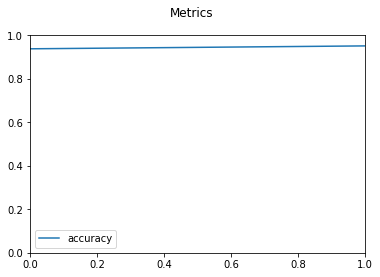

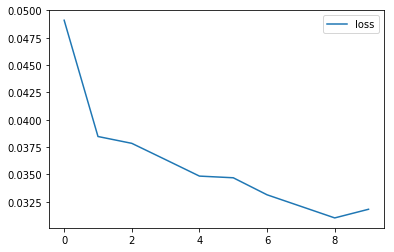

In [82]:
ax = plt.axis()
plt.axis(ax)
# plt.figure(figsize=(5, 5))
# plt.suptitle("hello")
plt.plot(acc, label = 'accuracy')
plt.legend()
plt.show()
plt.plot(loss, label = 'loss')
plt.legend()
plt.show()